# Predicción de Renuncia

### Librerias

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Manejo de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algoritmos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metricas
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#Afinar hiperparametros
from sklearn.model_selection import GridSearchCV

#ignorar los warnings
import warnings
warnings.filterwarnings('ignore')

### Carga de Datos

In [5]:
df = pd.read_csv("HR_Employee_Attrition_Dataset con faltantes.csv")

df.dropna(inplace=True)

In [6]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Info de Datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2916 non-null   int64  
 1   Attrition                 2916 non-null   object 
 2   Age                       2916 non-null   int64  
 3   BusinessTravel            2916 non-null   object 
 4   DailyRate                 2916 non-null   int64  
 5   Department                2916 non-null   object 
 6   DistanceFromHome          2916 non-null   float64
 7   Education                 2916 non-null   int64  
 8   EducationField            2916 non-null   object 
 9   EnvironmentSatisfaction   2916 non-null   int64  
 10  Gender                    2916 non-null   object 
 11  HourlyRate                2916 non-null   float64
 12  JobInvolvement            2916 non-null   int64  
 13  JobLevel                  2916 non-null   int64  
 14  JobRole      

**Observaciones**:

- Hay 2940 observaciones
- Hay 34 características sin valores nulos

In [8]:
df.nunique()

EmployeeNumber              2916
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
DisobedienceRules              2
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Observaciones**:

- El EmployeeNumber es un identificador único para cada empleado. Podemos eliminar esta
columna ya que no agregaría ningún valor a nuestro análisis.
- Over18 y StandardHours tienen solo 1 valor único. Podemos eliminar estas columnas ya
que no agregarán ningún valor a nuestro análisis.
- Sobre la base del número de valores únicos en cada columna y la descripción de los datos,
podemos identificar las columnas numéricas y categóricas en los datos

In [9]:
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)

In [10]:
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome',
            'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
            'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate',
            'YearsInCurrentRole', 'YearsSinceLastPromotion',
            'YearsWithCurrManager', 'TrainingTimesLastYear']

cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department',
            'Education', 'EducationField', 'DisobedienceRules', 'JobSatisfaction',
            'EnvironmentSatisfaction', 'WorkLifeBalance', 'StockOptionLevel',
            'Gender', 'PerformanceRating', 'JobInvolvement',
            'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

### Exploración de datos

#### Análisis univariable

In [11]:
# Estadísticas (Poner muchos decimales esta mal...)
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2916.0,802.589849,403.028490,102.0,465.0,802.0,1157.00,1499.0
Age,2916.0,36.927984,9.129728,18.0,30.0,36.0,43.00,60.0
DistanceFromHome,2916.0,9.183813,8.097169,1.0,2.0,7.0,14.00,29.0
MonthlyIncome,2916.0,6511.063786,4709.972160,1009.0,2911.0,4936.0,8383.75,19999.0
MonthlyRate,2916.0,14322.323731,7116.966418,2094.0,8045.0,14242.0,20463.25,26999.0
PercentSalaryHike,2916.0,15.208162,3.658428,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,2916.0,11.276063,7.768935,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,2916.0,6.997942,6.102666,0.0,3.0,5.0,9.00,40.0
NumCompaniesWorked,2916.0,2.696845,2.500498,0.0,1.0,2.0,4.00,9.0
HourlyRate,2916.0,65.847051,20.315570,30.0,48.0,66.0,83.00,100.0


**Observaciones:**

- La edad promedio de los empleados es de alrededor de 37 años. Tiene un rango
alto, de 18 años a 60 años, lo que indica una buena diversidad de edades en la organización.
- Al menos el 50% de los empleados viven en un radio de 7 KM de la organización. Sin embargo, existen algunos valores extremos, dado que el valor máximo es de 29 km.
- El ingreso mensual promedio de un empleado es de USD 6500. Tiene un rango alto
de valores de 1K-20K USD, lo cual es de esperar para la distribución de ingresos de cualquier
organización. Hay una gran diferencia entre el valor del 3er cuartil (alrededor de USD 8400)
y el valor máximo (casi USD 20000), lo que demuestra que las personas con mayores ingresos
de la empresa tienen un ingreso desproporcionadamente alto en comparación con el resto de
los empleados. Nuevamente, esto es bastante común en la mayoría de las organizaciones.
- El aumento salarial promedio de un empleado es de alrededor del 15 %. Al menos
el 50 % de los empleados obtuvo un aumento salarial del 14 % o menos, siendo el aumento
salarial máximo del 25 %.
- La media de años de vinculación de un empleado a la empresa es de 7.
- En promedio, la cantidad de años desde que un empleado obtuvo una promoción
es ~2.19. La mayoría de los empleados han sido promovidos desde el último año.

#NOTA CLASE: los datos tienen varianzas muy altas, lo que hace complicado obtener un modelo fiable

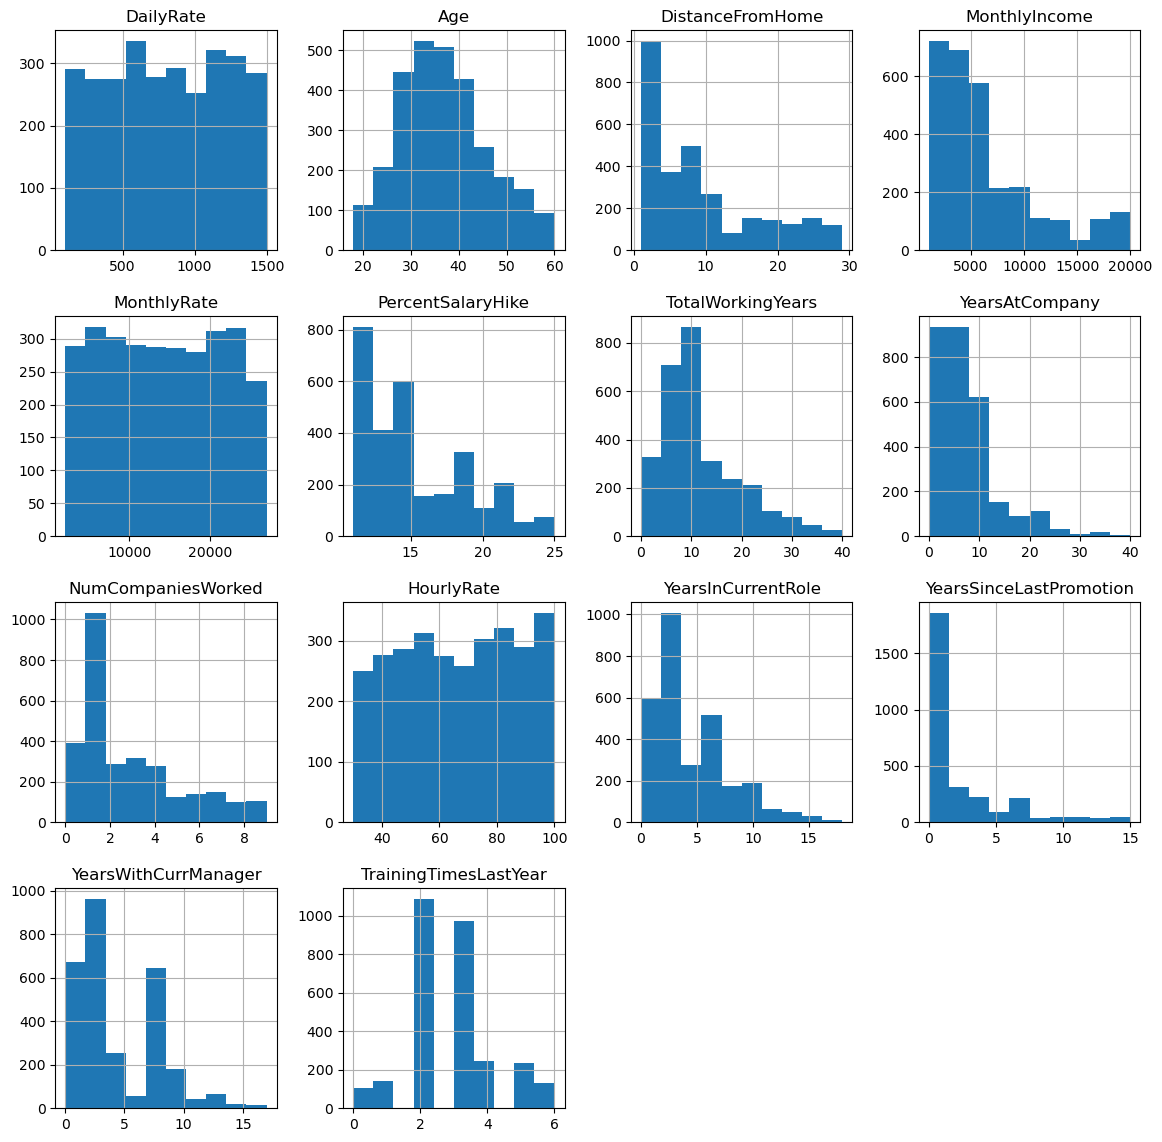

In [12]:
# Creando histogramas
df[num_cols].hist(figsize = (14, 14))
plt.show()

**Observaciones:**
- **La distribución por edades es cercana a una distribución normal**, con la mayoría de
los empleados entre 25 y 50 años.
- **DistanceFromHome tiene una distribución sesgada hacia la derecha**, lo que significa que la mayoría de los empleados viven cerca del trabajo, pero hay algunos que viven muy lejos.
- **MonthlyIncome y TotalWorkingYears están sesgados a la derecha**, lo que indica que la mayoría de los trabajadores están en puestos de nivel inicial/medio en la organización.
- **El porcentaje de aumento salarial está sesgado hacia la derecha**, lo que significa que los empleados en su mayoría obtienen aumentos porcentuales de salario más bajos.
- **La distribución de la variable YearsAtCompany muestra una buena proporción de trabajadores con más de 10 años, lo que indica un número significativo de empleados leales a la organización.**
- **La distribución YearsInCurrentRole tiene tres picos en 0, 2 y 7**. Hay algunos
empleados que han permanecido en el mismo rol durante 15 años o más.
- **La distribución de la variable YearsSinceLastPromotion indica que algunos empleados no han recibido un ascenso en 10-15 años y siguen trabajando en la organización**. Se supone que estos empleados son empleados con mucha experiencia laboral en funciones de alta dirección, como cofundadores, empleados de C-suite, etc.
- **Las distribuciones de TarifaDiaria, TarifaHora y TarifaMensual parecen ser uniformes y no brindan mucha información.** Podría ser que la tarifa diaria se refiera a los ingresos obtenidos por día extra trabajado mientras que la tarifa horaria podría referirse al mismo concepto que se aplica a las horas extra trabajadas por día. Dado que estas tasas tienden a ser muy similares para varios empleados en el mismo departamento, eso explica la distribución uniforme que muestran. **Se pueden quitar y no va a afectar al modelo.**

#NOTAS CLASE: En caso de tener valores faltantes lo más directo y simple es drop si hay gran cantidad de datos vs los faltantes, correr el modelo y ver si funciona. En casos específicos (como si la edad es normal) se puede remplazar por la media, o en caso de Distance from home, tal vez valdría más la pena usar la moda.

#### Análisis univariable de categóricas

In [13]:
for i in cat_cols:
    print(df[i].value_counts(normalize = True))
    print('*' * 40)

Attrition
No     0.83882
Yes    0.16118
Name: proportion, dtype: float64
****************************************
OverTime
No     0.713992
Yes    0.286008
Name: proportion, dtype: float64
****************************************
BusinessTravel
Travel_Rarely        0.716049
Travel_Frequently    0.176955
Non-Travel           0.106996
Name: proportion, dtype: float64
****************************************
Department
Research & Development    0.653635
Sales                     0.303155
Human Resources           0.043210
Name: proportion, dtype: float64
****************************************
Education
3    0.388889
4    0.270576
2    0.192044
1    0.115912
5    0.032579
Name: proportion, dtype: float64
****************************************
EducationField
Life Sciences       0.412209
Medical             0.315158
Marketing           0.108025
Technical Degree    0.090192
Other               0.055898
Human Resources     0.018519
Name: proportion, dtype: float64
**************************

**Observaciones:**
- **La tasa de deserción de empleados es del 16%.** 
- **Alrededor del 28% de los empleados trabajan horas extras.** Este número parece estar elevado y podría indicar la vida laboral de un empleado estresado.
- El 71% de los empleados ha viajado pocas veces, mientras que alrededor del 17% tiene que viajar con frecuencia.
- Alrededor del 73% de los empleados provienen de una formación académica en los campos de Ciencias de la Vida y Medicina.
- Más del 65% de los empleados trabajan en el departamento de Investigación y Desarrollo de la organización.
- **Cerca del 40% de los empleados tienen baja (1) o media (2) satisfacción laboral** y satisfacción ambiental en la organización, lo que indica que la moral de la empresa parece estar algo baja.
- **Más del 30% de los empleados muestran una participación laboral baja (1) a media (2).**
- Más del 80% de los empleados no tienen o tienen muy pocas opciones sobre acciones.
- En términos de calificaciones de desempeño, ninguno de los empleados ha sido
calificado por debajo de 3 (excelente). Alrededor del 85% de los empleados tienen una
calificación de desempeño igual a 3 (excelente), mientras que el resto tiene una calificación de
4 ( pendiente). Esto podría significar que la mayoría de los empleados tienen un desempeño
superior, o el escenario más probable es que la organización podría ser muy indulgente con
su proceso de evaluación del desempeño.

NOTAS CLASE: El dataset está sumamente imbalanceado, el primer paso debe de ser intentar usar el dataset así, y luego, de ser necesario, balancear.

#### Análisis bivariado y multivariado

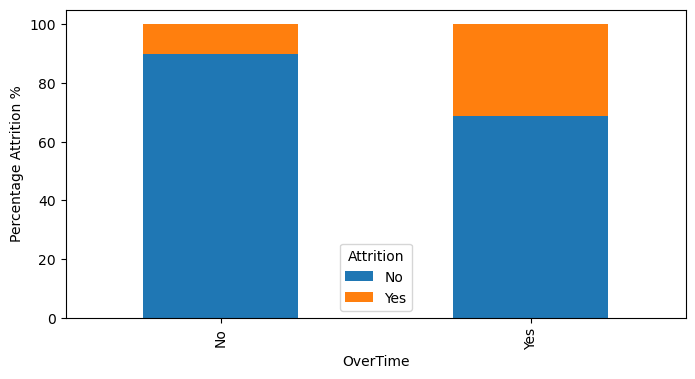

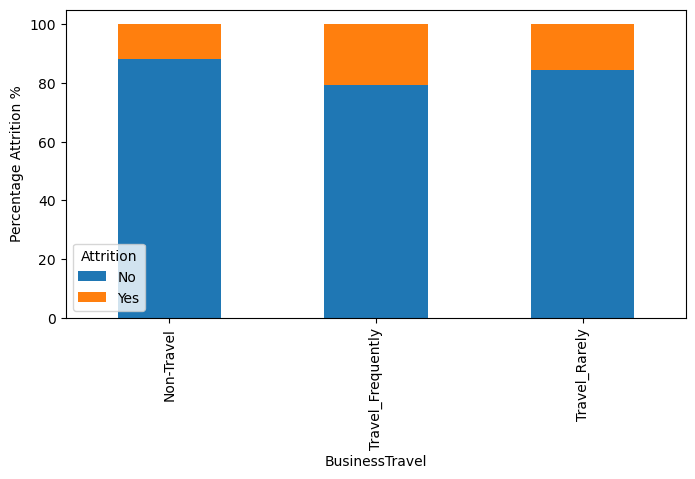

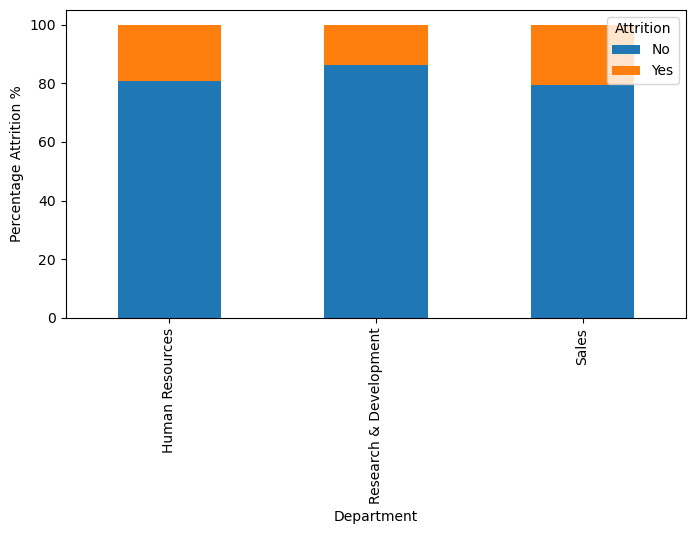

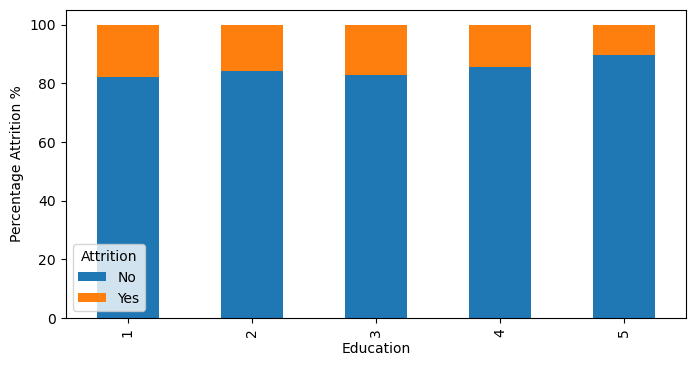

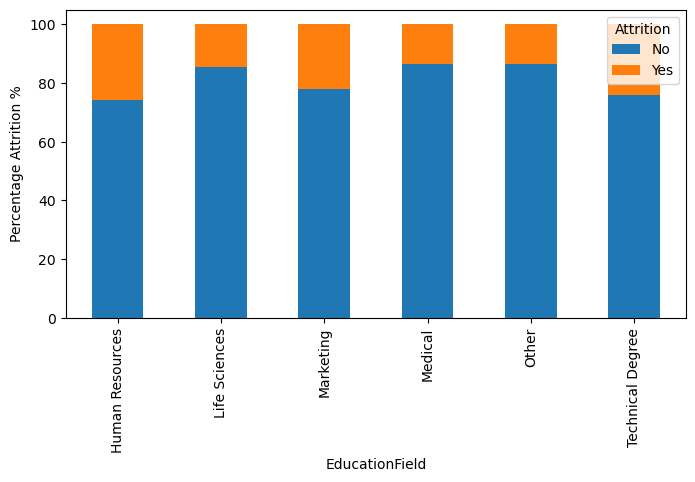

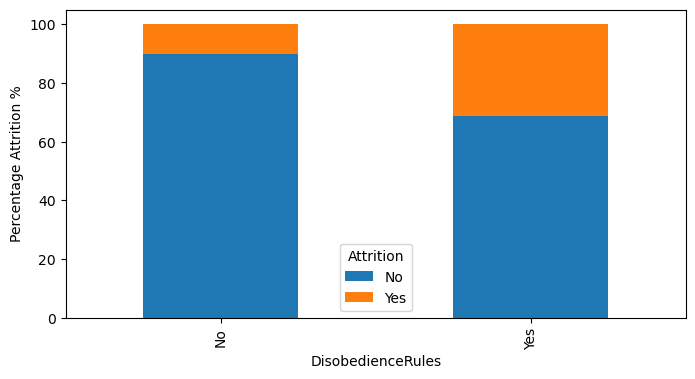

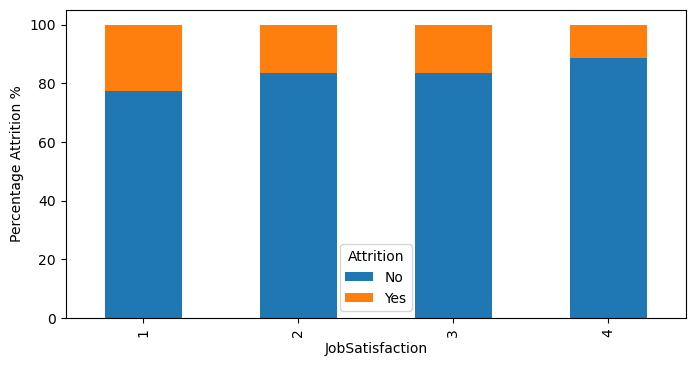

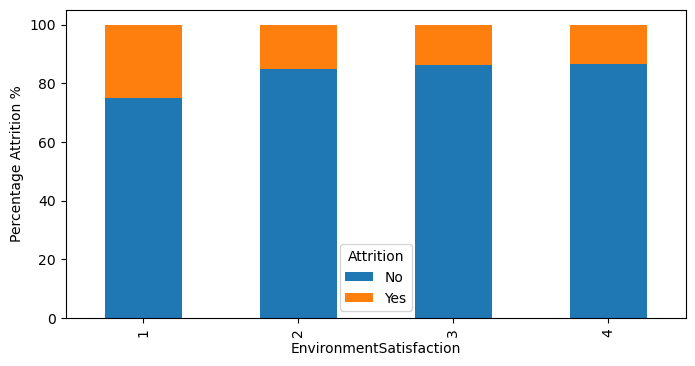

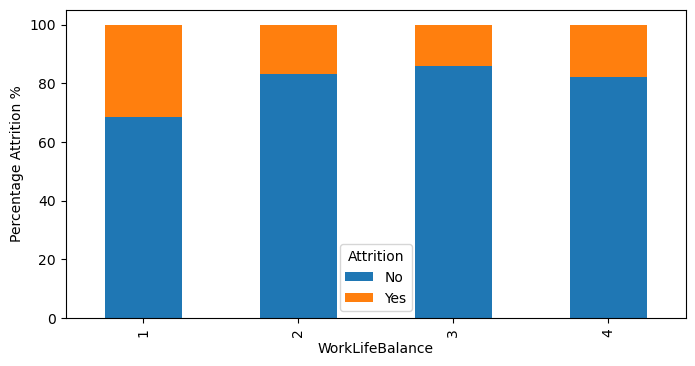

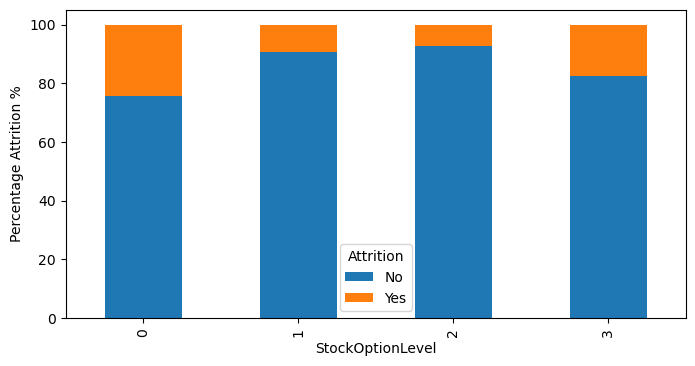

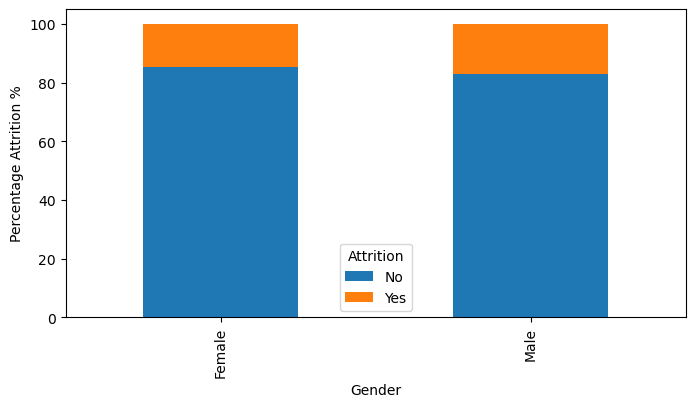

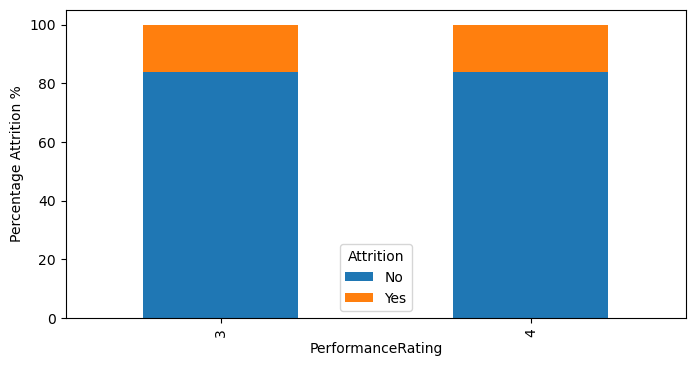

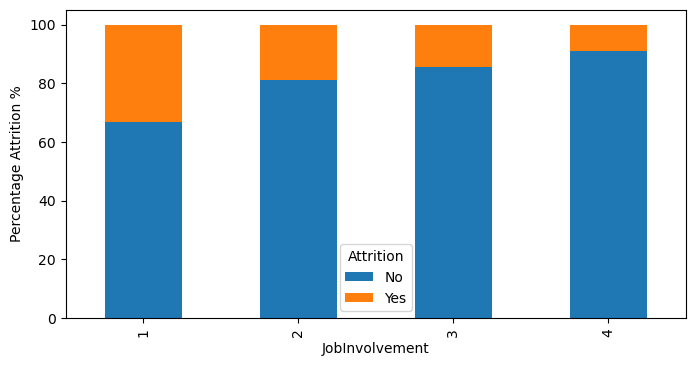

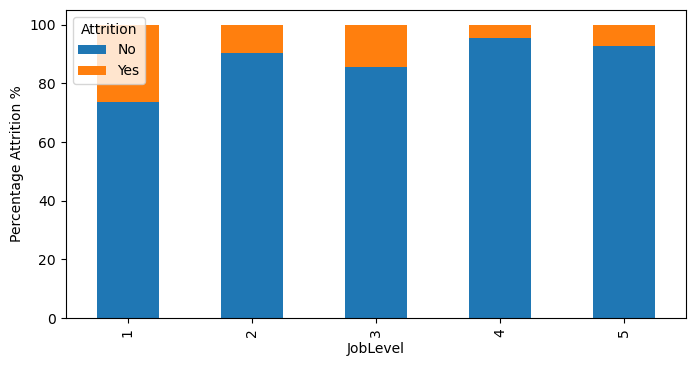

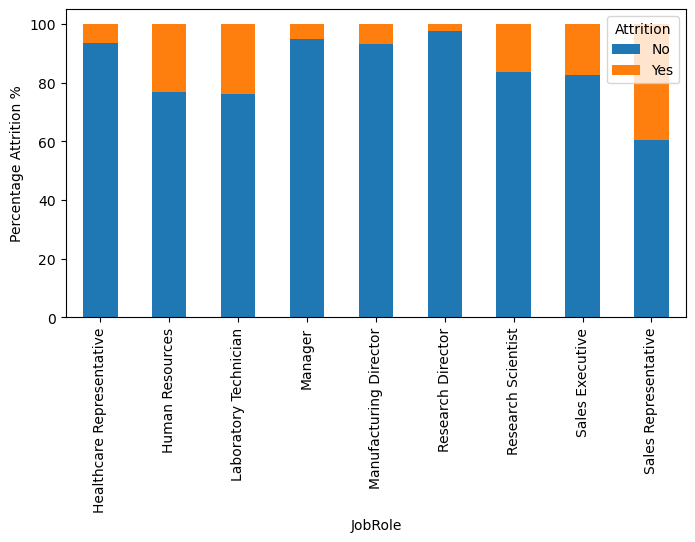

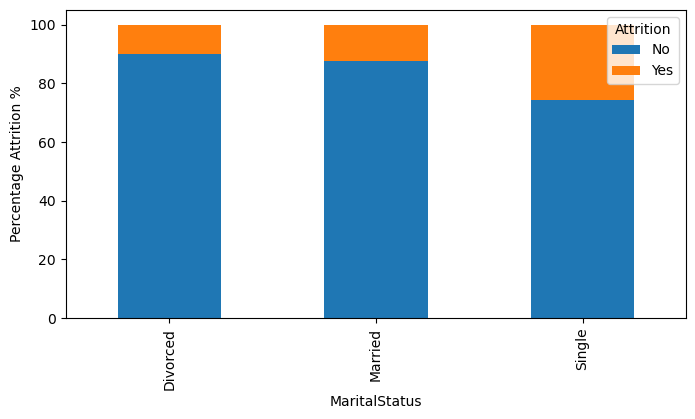

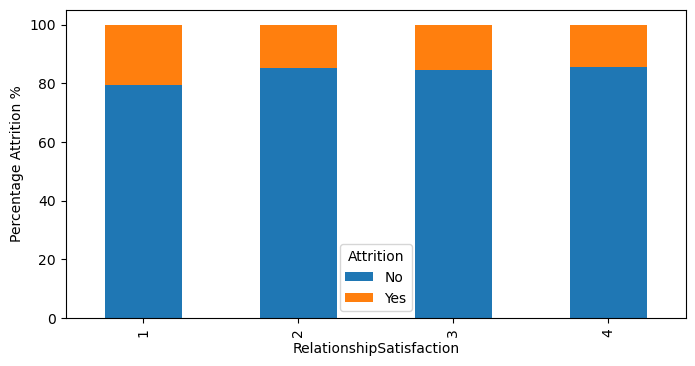

In [14]:
for i in cat_cols:
    if i != 'Attrition':
        (
            pd.crosstab(df[i], df['Attrition'], normalize = 'index')*100
        ).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Attrition %')

**Observaciones:**
- **Los empleados que trabajan horas extra tienen más de un 30 % de posibilidades de renunciar**, que es muy alto en comparación con el 10 % de posibilidades de renuncia de los empleados que no trabajan horas extra.
- Como se vio anteriormente, la mayoría de los empleados trabajan para el departamento de I+D. La posibilidad de desgaste allí es ~ 15%
- **Los empleados que trabajan como representantes de ventas tienen una tasa de deserción de alrededor del 40 %**, mientras que los RRHH y los técnicos tienen una tasa de deserción de alrededor del 25 %. Los departamentos de ventas y recursos humanos tienen tasas de deserción más altas en comparación con un departamento académico como Investigación y Desarrollo, una observación que tiene sentido intuitivo si se tienen en cuenta las diferencias en esos perfiles de trabajo. La naturaleza de alta presión y basada en incentivos de los roles de Ventas y Marketing puede estar contribuyendo a sus tasas de deserción más altas.
- **Cuanto menor es la participación laboral del empleado, mayores parecen ser sus posibilidades de abandono, y los empleados con participación laboral calificada como 1 pierden el 35 %.** La razón de esto podría ser que los empleados con menor participación laboral pueden sentirse excluidos o menos valorados y ya han comenzado a explorar nuevas opciones, lo que lleva a una mayor tasa de deserción.
- **Los empleados en un nivel de trabajo más bajo también abandonan más**, y los empleados de JobLevel calificados como 1 muestran casi un 25 % de probabilidad de abandono. Estos pueden ser empleados jóvenes que tienden a explorar más opciones en las etapas iniciales de sus carreras.
- **Una calificación baja de equilibrio entre el trabajo y la vida lleva a los empleados al desgaste** ~ 30% de los que están en la categoría de calificación 1 muestran deserción. 

**Veamos la relación entre la deserción y las variables numéricas**

In [15]:
# Media de la variables numéricas agrupadas por abandono del puesto de trabajo
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.444399,37.576860,8.911284,6844.257563,14275.035977,15.231807,11.869583,7.370809,2.647179,65.923957,4.480376,2.237122,4.367948,2.835650
Yes,751.304255,33.551064,10.602128,4777.038298,14568.421277,15.085106,8.187234,5.057447,2.955319,65.446809,2.882979,1.927660,2.842553,2.617021


**Observaciones:**
- **Los empleados que abandonan la empresa tienen un ingreso promedio casi un 30% más bajo y un 30 % menos de experiencia laboral que los que no lo hacen.** Estos podrían ser los empleados que buscan explorar nuevas opciones y aumentar su salario con un cambio de empresa.
- **Los empleados que muestran desgaste también tienden a vivir un 16 % más lejos de la empresa que los que no lo están**. El viaje más largo hacia y desde el trabajo podría significar que tienen que gastar más tiempo y dinero todos los días, y esto podría generar insatisfacción laboral y querer dejar la organización.

**Hemos encontrado qué tipo de empleados abandonan más la empresa.**

#### Relación entre diferentes variables numéricas

<Axes: >

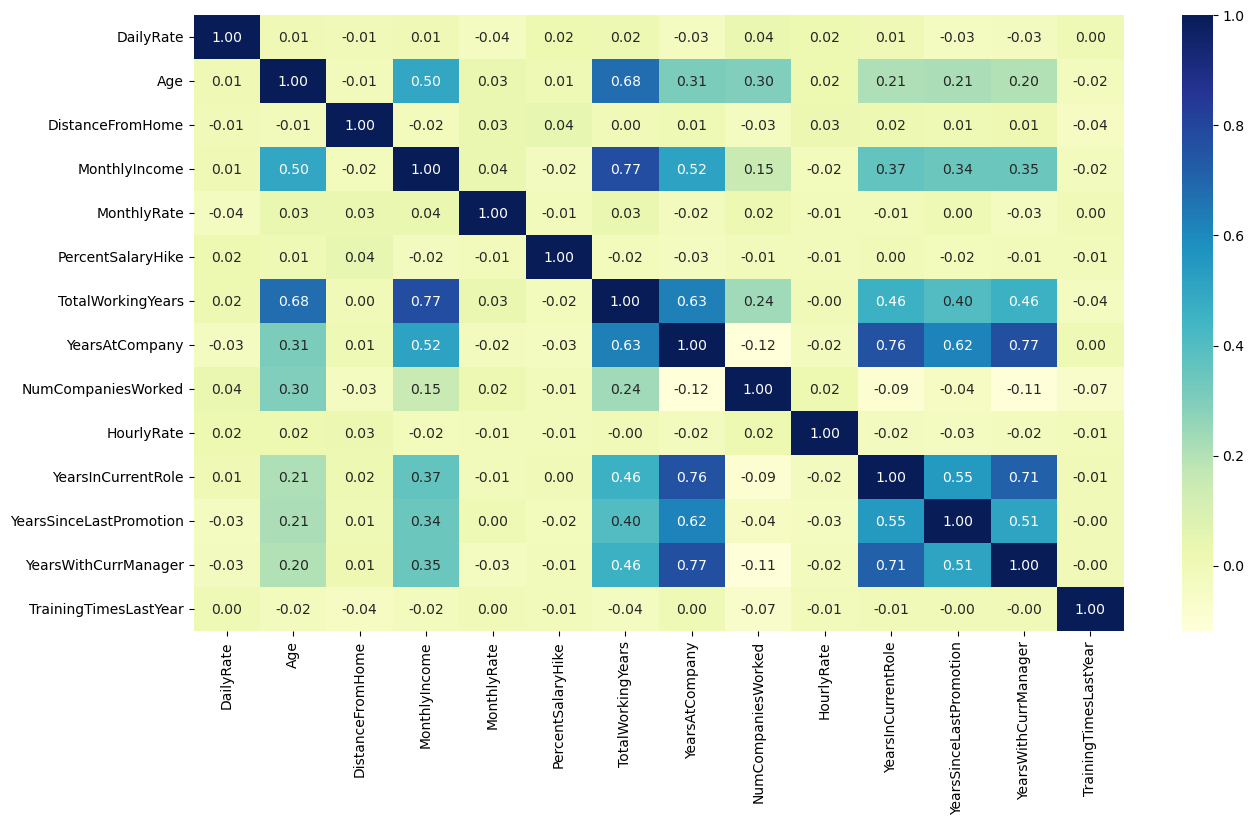

In [16]:
#Diagrama de corrrelación
plt.figure(figsize = (15, 8))
sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observaciones:**
- **La experiencia laboral total, los ingresos mensuales, los años en la empresa y los años con los gerentes actuales están altamente correlacionados entre sí y con la edad de los empleados**, lo cual es fácil de entender ya que estas variables muestran un aumento con la edad para la mayoría de los empleados.
- Los años en la empresa y los años en el puesto actual se correlacionan con los años desde la última promoción, lo que significa que la empresa no está dando promociones en el momento adecuado.

NOTAS CLASE: De base no quitas nada, pero si hay muchas variables y esto afecta el performance, se pueden quitar las variables altamente correlacionadas (Estrictamente > 0.85). Para seleccionar cual quitar, pruebas las permutaciones y eliges la que mejor desempeño tenga

#### Resumen de los resultados obtenidos

**Descripción de datos:**
- Hay 2940 observaciones y 34 columnas en los datos.
- Todas las columnas tienen 2940 valores no nulos, es decir, no faltan valores en los datos.
- Un número de empleado es un identificador único para cada empleado. Podemos eliminar esta columna ya que no agregaría ningún valor a nuestro análisis.
- Over18 y StandardHours solo tienen 1 valor único. Podemos eliminar estas columnas ya que no agregarán ningún valor a nuestro análisis.
- Sobre la base de la cantidad de valores únicos en cada columna y la descripción de los datos, podemos identificar las columnas continuas y categóricas en los datos.


**Limpieza de datos:**
- Las variables independientes en este conjunto de datos tienen diferentes escalas. Cuando las características tienen escalas diferentes entre sí, existe la posibilidad de que se otorgue una mayor ponderación a las características que tienen una magnitud más alta, y dominarán sobre otras características cuyos cambios de magnitud pueden ser menores pero cuyos cambios porcentuales pueden ser igual de significativos. o incluso más grande. Esto afectará el rendimiento de nuestro algoritmo de aprendizaje automático, y no queremos que nuestro algoritmo esté sesgado hacia una función.
- La solución a este problema es Escalado de características, es decir, escalar el conjunto de datos para dar a cada variable transformada una escala comparable.
- En este problema, usaremos el método Standard Scaler, que centra y escala el conjunto de datos usando el Z-Score. Estandariza las características restando la media y escalándola para tener una varianza unitaria

### Construcción de modelos

1. Preparar los datos para el modelado.
2. Divida los datos en conjuntos de entrenamiento y prueba.
3. Construya el modelo sobre los datos de entrenamiento.
4. Ajuste el modelo si es necesario.
5. Pruebe los datos en el en el conjunto de prueba.

#### Data preparation

In [17]:
# Creando la lista de columnas para las que necesitamos crear variables ficticias
to_get_dummies_for = ['BusinessTravel', 'Department', 'Education',
                      'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
                      'JobLevel', 'JobRole', 'MaritalStatus']
# Creando variables ficticias
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapeo de las variables de horas extras, Obediencia de Reglas y de renuncia
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}
dict_DisobedienceRules = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['DisobedienceRules'] = df.DisobedienceRules.map(dict_DisobedienceRules)
df['Attrition'] = df.Attrition.map(dict_attrition)

In [18]:
#Separando las variables independientes de la que se estimará
Y = df.Attrition
X = df.drop(columns = ['Attrition'])

#### Escalado de datos


Las variables independientes en este conjunto de datos tienen diferentes rangos. Cuando las características tienen escalas diferentes entre sí, existe la posibilidad de que se otorgue una mayor ponderación a las características que tienen una magnitud más alta, y dominarán sobre otras características cuyos cambios de magnitud pueden ser menores pero cuyos cambios porcentuales pueden ser igual de significativos. o incluso más grande. Esto afectará el rendimiento de nuestro algoritmo de aprendizaje automático y no queremos que nuestro algoritmo esté sesgado hacia una característica.

La solución a este problema es Escalado de características, es decir, escalar el conjunto de datos para dar a cada variable transformada una escala comparable. En este problema, usaremos el método Standard Scaler, que centra y escala el conjunto de datos usando el Z-Score.

Estandariza las características restando la media y escalándola para tener una varianza unitaria.
La puntuación estándar de la muestra x se calcula como:

**z = (x - u) / s**

donde u es la media de las muestras de entrenamiento (cero) y s es la desviación estándar de las muestras de entrenamiento.

In [19]:
# Escalando datos
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

#### Train Test Split

Algunos problemas de clasificación pueden exhibir un gran desequilibrio en la distribución de las clases objetivo: por ejemplo, podría haber varias veces más muestras negativas que muestras positivas. En tales casos, se recomienda utilizar la técnica de muestreo estratificado para garantizar que las frecuencias de clase relativas se conserven aproximadamente en cada tren y pliegue de validación.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3,
                                                     random_state = 1, stratify = Y)

#### Criterio de Evaluación

**El modelo puede hacer dos tipos de predicciones incorrectas:**
1. Predecir que un empleado abandonará cuando el empleado no renuncia
2. Predecir que un empleado no renuncia cuando el empleado realmente deja la empresa

**¿Qué caso es más importante?**
- Predecir que el empleado no abandonará pero el empleado abandonará, es decir, perderá un empleado o activo valioso. Esto se consideraría un error importante para cualquier predictor de deserción de empleados y, por lo tanto, es el caso más importante de predicciones erróneas.

**¿Cómo reducir esta pérdida, es decir, la necesidad de reducir los falsos negativos?**
- La empresa querría maximizar el Recall, cuanto mayor sea el Recall, mayores serán las posibilidades de minimizar los falsos negativos. Por lo tanto, el enfoque debe estar en aumentar el Recall (minimizando los falsos negativos) o, en otras palabras, identificando muy bien los verdaderos positivos (es decir, Clase 1), de modo que la empresa pueda proporcionar incentivos para controlar la tasa de deserción especialmente, para los mejores -intérpretes. Esto ayudaría a optimizar el costo general del proyecto para retener a los mejores talentos.

Además, creemos una función para calcular e imprimir el informe de clasificación y la matriz de confusión para que no tengamos que volver a escribir el mismo código repetidamente para cada modelo.

In [21]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attrite','Attrite'], yticklabels = ['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Construyendo el modelo

Construiremos 2 modelos diferentes: 
- Regresión logística ver https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python 
- K-Vecinos más cercanos (K-NN) ver https://realpython.com/knn-python/

#### Regresión Logística

- La regresión logística es un algoritmo de aprendizaje supervisado, generalmente utilizado para problemas de clasificación binaria, es decir, donde la variable dependiente es categórica y tiene solo dos valores posibles. En la regresión logística, usamos la función sigmoidea para calcular la probabilidad de un evento Y, dadas algunas características X como:

P(Y)=1/(1 + exp(-X))

In [22]:
# Ajustando el modelo
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1712
           1       0.75      0.48      0.58       329

    accuracy                           0.89      2041
   macro avg       0.83      0.72      0.76      2041
weighted avg       0.88      0.89      0.88      2041



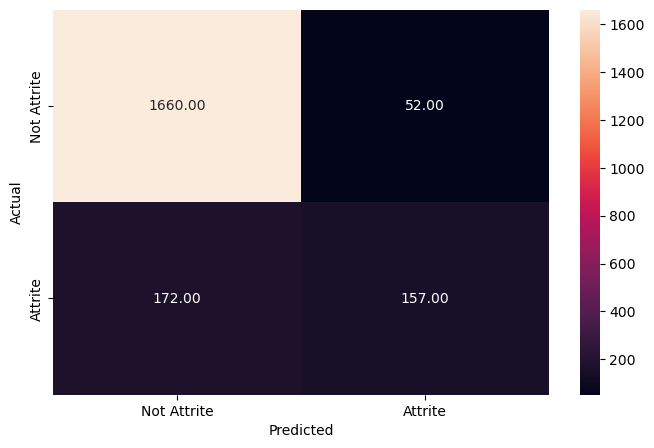

In [23]:
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       734
           1       0.78      0.45      0.57       141

    accuracy                           0.89       875
   macro avg       0.84      0.71      0.76       875
weighted avg       0.88      0.89      0.88       875



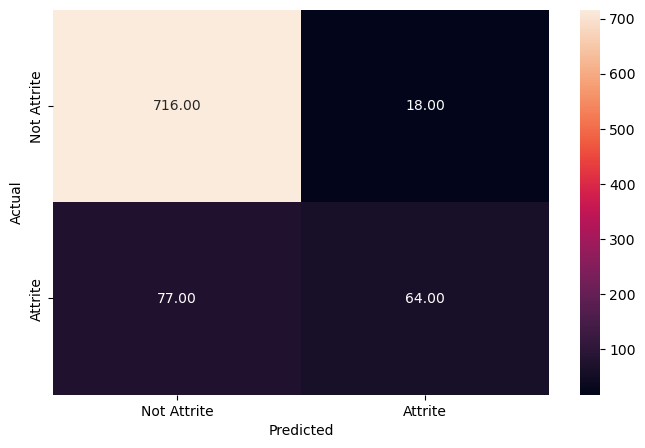

In [24]:
# Verificando con los datos de prueba
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observaciones:** 
- **Obtenemos una precisión de alrededor del 90 %** en el entrenamiento y en los conjuntos de datos de prueba. 
- Sin embargo, **el recall de este modelo es solo de alrededor del 50 % para la clase 1 en los datos del entrenamiento y del 46 % en los datos de prueba.**
- Como el retiro es bajo, este modelo no funcionará bien para diferenciar a los empleados que tienen una alta probabilidad de abandonar la empresa, lo que significa que eventualmente no ayudará a reducir la tasa de abandono. 
- Como podemos ver en la Matriz de Confusión, **este modelo no es bueno para identificar a los empleados que están en riesgo de desgaste.**

**Revisemos los coeficientes y encontremos qué variables conducen a la deserción y cuáles pueden ayudar a reducir la deserción.**

In [25]:
# Imprimiendo coeficientes de regresión logística
cols = X.columns
coef_lg = lg.coef_
pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
OverTime,0.717730
YearsAtCompany,0.643618
MaritalStatus_Single,0.642740
Department_Research & Development,0.593104
JobRole_Sales Executive,0.564521
NumCompaniesWorked,0.543331
JobLevel_5,0.436179
BusinessTravel_Travel_Frequently,0.425065
Department_Sales,0.402786
YearsSinceLastPromotion,0.389772


Los coeficientes del modelo de regresión logística nos dan el logaritmo de las probabilidades, que es difícil de interpretar en el mundo real. Podemos convertir el logaritmo de probabilidades en probabilidades tomando su exponencial

In [26]:
odds = np.exp(lg.coef_[0]) # Finding the odds
# Agregar las probabilidades a un DataFrame y ordenar los valores
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by ='odds', ascending = False)

,odds
OverTime,2.049775
YearsAtCompany,1.903355
MaritalStatus_Single,1.901684
Department_Research & Development,1.809597
JobRole_Sales Executive,1.758606
NumCompaniesWorked,1.721733
JobLevel_5,1.546785
BusinessTravel_Travel_Frequently,1.529689
Department_Sales,1.495987
YearsSinceLastPromotion,1.476644


**Precision-Recall Curve para regresión logistica**

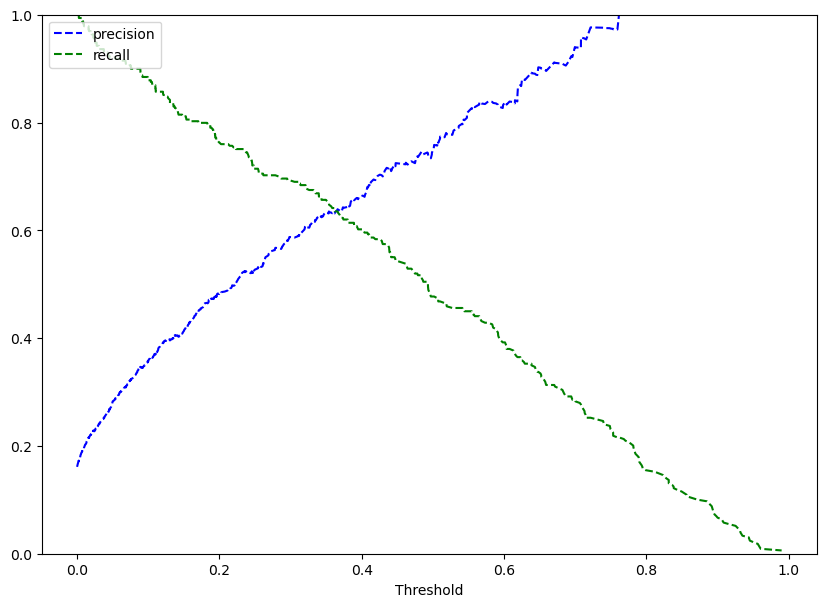

In [27]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train,
                                                                  y_scores_lg[:, 1])
# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

**Observación:** 
- Podemos ver que la precisión y el recall están equilibradas para un umbral de
alrededor de 0,35.

**Veamos el rendimiento del modelo en este umbral.**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1712
           1       0.64      0.62      0.63       329

    accuracy                           0.88      2041
   macro avg       0.79      0.78      0.78      2041
weighted avg       0.88      0.88      0.88      2041



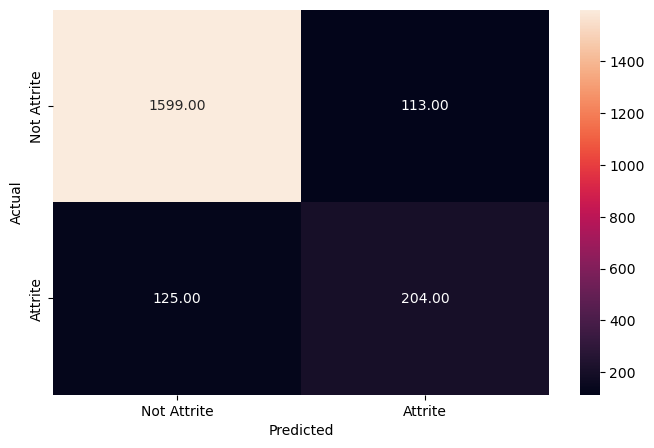

In [28]:
optimal_threshold1 = .38
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observaciones:**
- El rendimiento del modelo ha mejorado. El retiro ha aumentado significativamente para la clase 1.
- Vamos a comprobar el rendimiento de los datos de prueba.

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       734
           1       0.65      0.60      0.62       141

    accuracy                           0.88       875
   macro avg       0.79      0.77      0.78       875
weighted avg       0.88      0.88      0.88       875



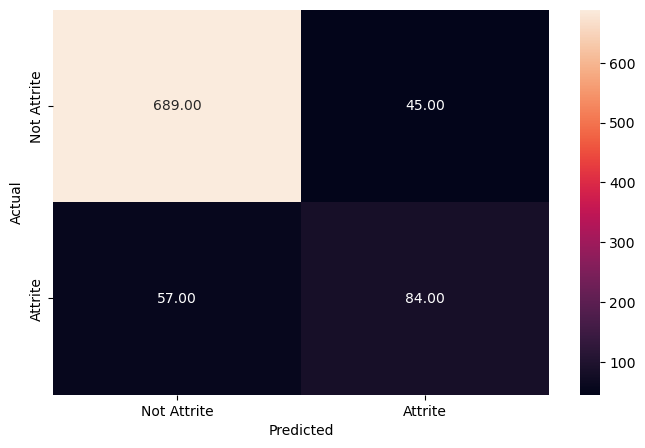

In [29]:
optimal_threshold1 = .35
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observaciones:**
- El modelo está dando un **rendimiento similar en la prueba y los conjuntos de datos de entrenamiento**, es decir, el modelo está dando un rendimiento generalizado.
- **El recall de los datos de prueba ha aumentado** mientras que, al mismo tiempo, la precisión ha disminuido ligeramente, lo que es de esperar al ajustar el umbral.
- El recall y la precisión promedio del modelo son buenas, pero veamos si podemos obtener un rendimiento aún mejor con otros algoritmos.

Ver https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

#### K-Nearest Neighbors (K-NN)

K-NN utiliza funciones de los datos de entrenamiento para predecir los valores de los nuevos puntos de datos, lo que significa que se le asignará un valor al nuevo punto de datos en función de su similitud con los puntos de datos del conjunto de entrenamiento.

Los siguientes pasos se realizan en K-NN:
- Seleccione K
- Calcular distancia (Euclidiana, Manhattan, etc.)
- Encuentra los K vecinos más cercanos
- Tomar el voto de la mayoría para las etiquetas

La “K” en el algoritmo K-NN es el número de vecinos más cercanos de los que deseamos tomar el voto. Generalmente, K se toma como un número impar cuando el número de clases es par, para obtener una mayoría de votos. Digamos K=3. En ese caso, haremos un círculo con el nuevo punto de datos como el centro del mismo tamaño que encierre solo los tres puntos de datos más cercanos en el plano.

**Pero antes de construir el modelo, debemos identificar el valor de K que se usará en K-NN. Realizaremos los siguientes pasos para el mismo.**
- Por cada valor de K (de 1 a 15), divida el conjunto de entrenamiento en un nuevo conjunto de entrenamiento y validación (30 veces)
- Escalar los datos de entrenamiento y los datos de validación.
- Tome el promedio del error en estos conjuntos de entrenamiento y validación para cada valor de K
- Grafique el tren promedio frente al error de validación para todas las K
- Elija el K óptimo de la gráfica donde los dos errores son comparables

In [30]:
knn = KNeighborsClassifier()

# Seleccionamos el valor óptimo de K para el cual la tasa de error es menor en los datos de validación
# Recorramos algunos valores de K para determinar el valor óptimo de K
train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train,y_train, test_size = 0.20)
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new))
        test_error.append(1 - knn.score(x_val, y_val))

    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.09429502852485738],
 2: [0.05345179738562094, 0.14034229828850855],
 3: [0.05837418300653596, 0.15778321108394458],
 4: [0.11225490196078433, 0.141320293398533],
 5: [0.10212418300653595, 0.13871230643846783],
 6: [0.12105800653594773, 0.14327628361858188],
 7: [0.11505310457516343, 0.14596577017114915],
 8: [0.12922794117647057, 0.14009779951100246],
 9: [0.1266952614379085, 0.14409127954360232],
 10: [0.13462009803921568, 0.1461287693561532],
 11: [0.13351715686274507, 0.14400977995110023],
 12: [0.1378063725490196, 0.1506112469437653],
 13: [0.1343545751633987, 0.15036674816625917],
 14: [0.140625, 0.1508557457212714]}

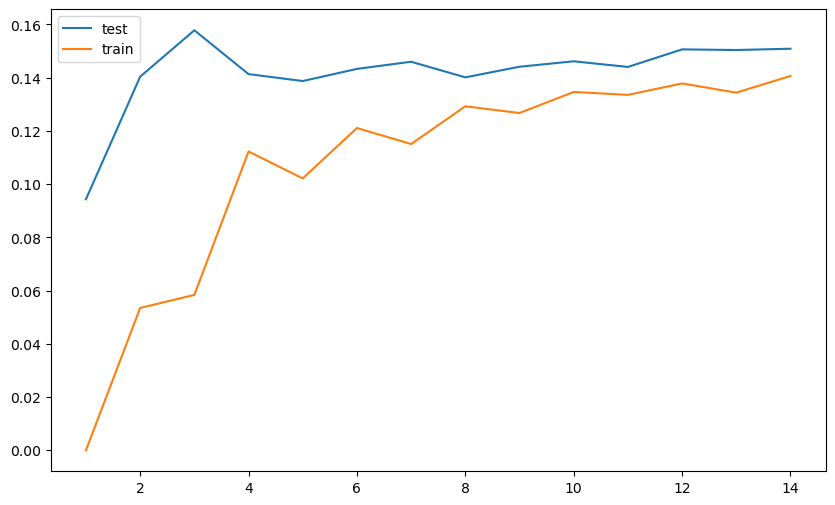

In [31]:
kltest = []
vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))
plt.plot(kltest, vltest, label = 'test' )
plt.plot(kltrain, vltrain, label = 'train')
plt.legend()
plt.show()

**Observaciones:**
- Podemos ver que el error de prueba (error en los datos de validación) es más o menos similar para K mayor o igual a 5. Pero el error de entrenamiento sigue aumentando al aumentar K. 
- Esto implica que obtendríamos un tren y un error de prueba más bajos si elegimos K = 5. Además, si elegimos un valor más alto de K, el modelo se sesgaría debido al desequilibrio en el conjunto de datos. - Entonces, ajustemos el modelo K-NN con K=5 en todo el conjunto de entrenamiento.

In [32]:
# K-NN modelo
knn = KNeighborsClassifier(n_neighbors = 5)

# Ajustando el modelo
knn.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      1712
           1       0.86      0.47      0.60       329

    accuracy                           0.90      2041
   macro avg       0.88      0.73      0.77      2041
weighted avg       0.90      0.90      0.89      2041



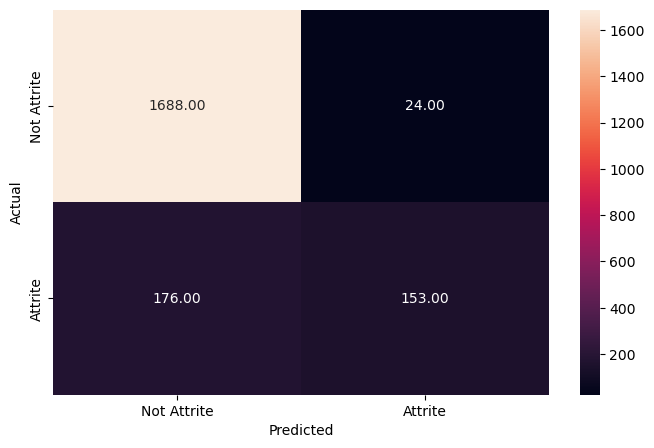

In [33]:
# Viendo el desempeño del modelo
y_pred_train_knn = knn.predict(x_train)
metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       734
           1       0.64      0.33      0.44       141

    accuracy                           0.86       875
   macro avg       0.76      0.65      0.68       875
weighted avg       0.84      0.86      0.84       875



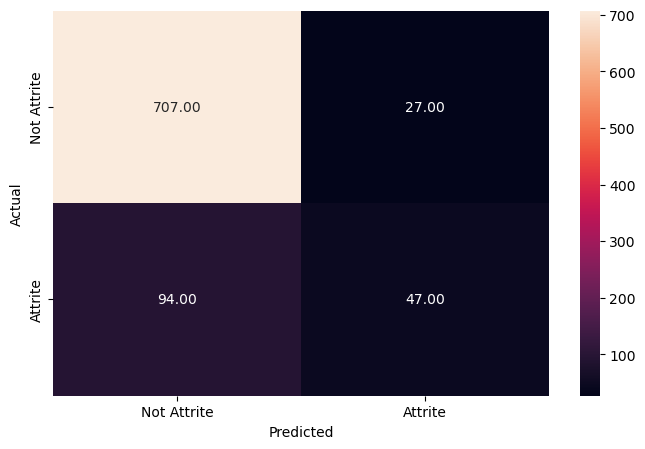

In [34]:
# Desempeño con datos de prueba
y_pred_test_knn = knn.predict(x_test)
metrics_score(y_test, y_pred_test_knn)

**Observación:**
- El modelo ofrece un rendimiento ligeramente mejor en el el entrenamiento en comparación con los datos de prueba, pero la **Recall no es muy buena**. 

Veamos si podemos mejorar eso

#### Uso de GridSearchCV para el ajuste de hiperparámetros del modelo

- El ajuste de los hiperparámetros es complicado en el sentido de que no existe una forma directa de calcular cómo un cambio en el valor del hiperparámetro reducirá la pérdida de su modelo, por lo que generalmente recurrimos a la experimentación.
- Grid search es una técnica de ajuste de modelos que intenta calcular los valores óptimos de los hiperparámetros.
- Es una búsqueda exhaustiva que se realiza sobre valores de parámetros específicos de un modelo.
- Los parámetros del estimador/modelo utilizado para aplicar estos métodos se optimizan mediante una búsqueda de cuadrícula con validación cruzada sobre una cuadrícula de parámetros.
- n_vecinos
    - Número de vecinos a utilizar.
- pesos={‘uniforme’, ‘distancia’}
    - uniforme : pesos uniformes. Todos los puntos en cada vecindario se ponderan por igual.
    - distancia : puntos de peso por el inverso de su distancia. En este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos más alejados
- pag
    - Cuando p = 1, esto es equivalente a usar Manhattan_distance (L1), y Eu-
clidean_distance (L2) se usa para p = 2.

In [35]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform','distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


- Hemos encontrado los mejores hiperparámetros para el clasificador K-NN. Usemos estos parámetros para construir el nuevo modelo K-NN y encontrar la recuperación de ese modelo.

In [36]:
# Ajustando con el mejor juego de parámetros
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00       329

    accuracy                           1.00      2041
   macro avg       1.00      1.00      1.00      2041
weighted avg       1.00      1.00      1.00      2041



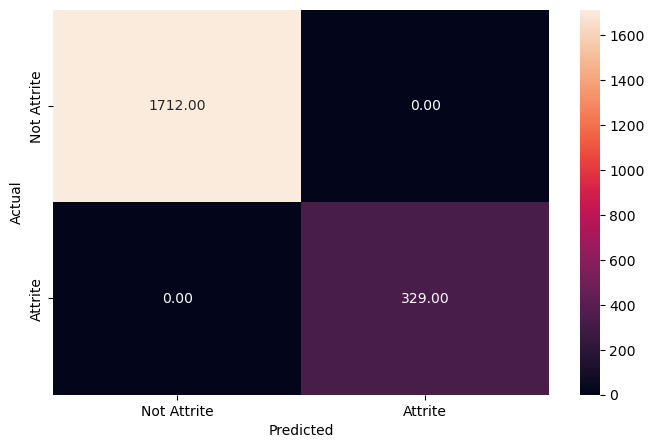

In [37]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       734
           1       0.81      0.79      0.80       141

    accuracy                           0.94       875
   macro avg       0.89      0.88      0.88       875
weighted avg       0.94      0.94      0.94       875



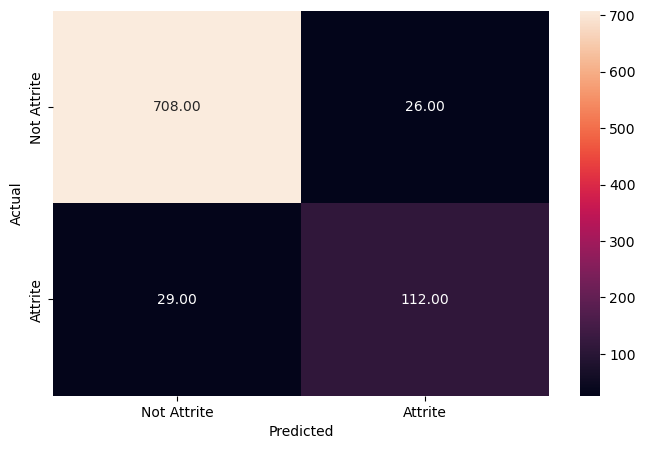

In [38]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_knn_estimator)

**Observaciones:**
- Este modelo parece estar sobreajustado, pero los resultados han mejorado significativamente en comparación con los modelos anteriores.
- **El recall y la precisión de las pruebas han aumentado significativamente** al ajustar el clasificador K-NN.
- Este parece ser un modelo de alto rendimiento que la empresa puede utilizar para controlar la tasa de deserción. Hay aproximadamente un 83 % de probabilidad de que el modelo detecte empleados que probablemente abandonen la empresa y la empresa pueda tomar las medidas adecuadas.

### Importancia de las características usando SHAP

Con la ayuda de una herramienta de visualización llamada SHAP, o **SHapley Additive exPlanations**, la salida de un modelo de aprendizaje automático puede hacerse más comprensible. Al calcular la contribución de cada característica a la predicción, se puede usar para explicar la predicción mediante cualquier modelo. La dirección de la relación (positiva o negativa) entre la variable predictiva y la variable objetivo también se indica mediante los valores SHAP. **Se utiliza una técnica denominada valores SHAP (SHapley Additive exPlanations), que se basa en la teoría de juegos cooperativos, para hacer que los modelos de aprendizaje automático sean más transparentes y comprensibles.**

#### Diagrama de barras SHAP

Trazamos el valor absoluto medio para cada columna de características como un gráfico de barras si se pasa un Explicador con muchas muestras.

Determinamos los valores SHAP absolutos medios en todas las observaciones para cada característica. Como no queremos que los números positivos y negativos se anulen entre sí, tomamos los valores absolutos. Un gráfico SHAP medio nos permitirá visualizar los valores SHAP agregados.

El valor SHAP nos ayuda a cuantificar la contribución de la función a una predicción. Un valor de SHAP más cercano a cero significa que la característica contribuye poco a la predicción, mientras que un valor de SHAP alejado de cero indica que la característica contribuye más. Por lo tanto, **grandes valores SHAP positivos/negativos se encuentran en características que afectan significativamente las predicciones del modelo.**

En el siguiente diagrama de barras, cada característica está representada por una barra separada

In [39]:
#!pip install shap

# Importing the SHAP library
import shap as sh

In [41]:
# Ajustando SHAP
explainer = sh.Explainer(knn_estimator.predict, x_test)
# Calculando valores
shap_values = explainer(x_test)

PermutationExplainer explainer: 876it [03:08,  4.64it/s]                                                               


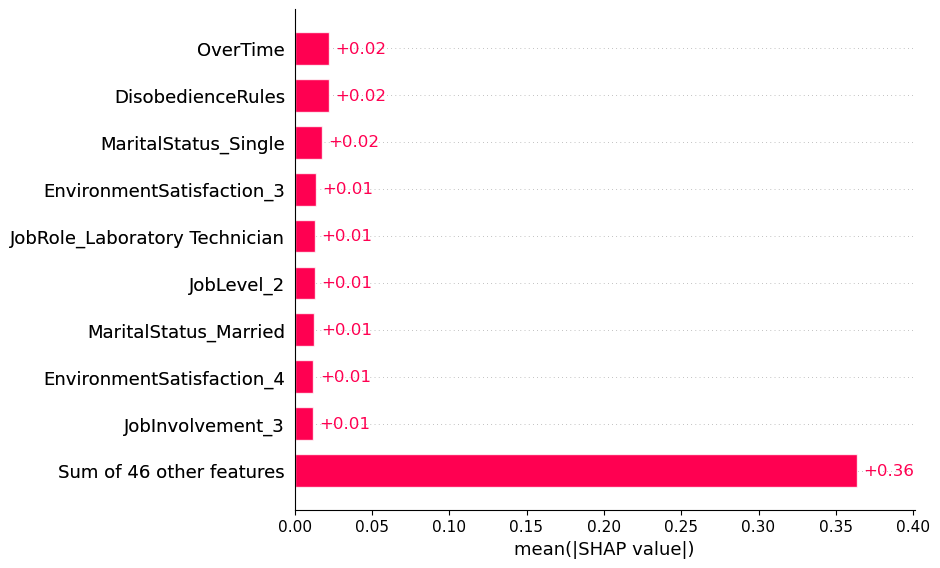

In [42]:
sh.plots.bar(shap_values)

**Nota:** De forma predeterminada, el gráfico de barras solo muestra un máximo de diez barras, pero
esto se puede controlar con el parámetro max_display.

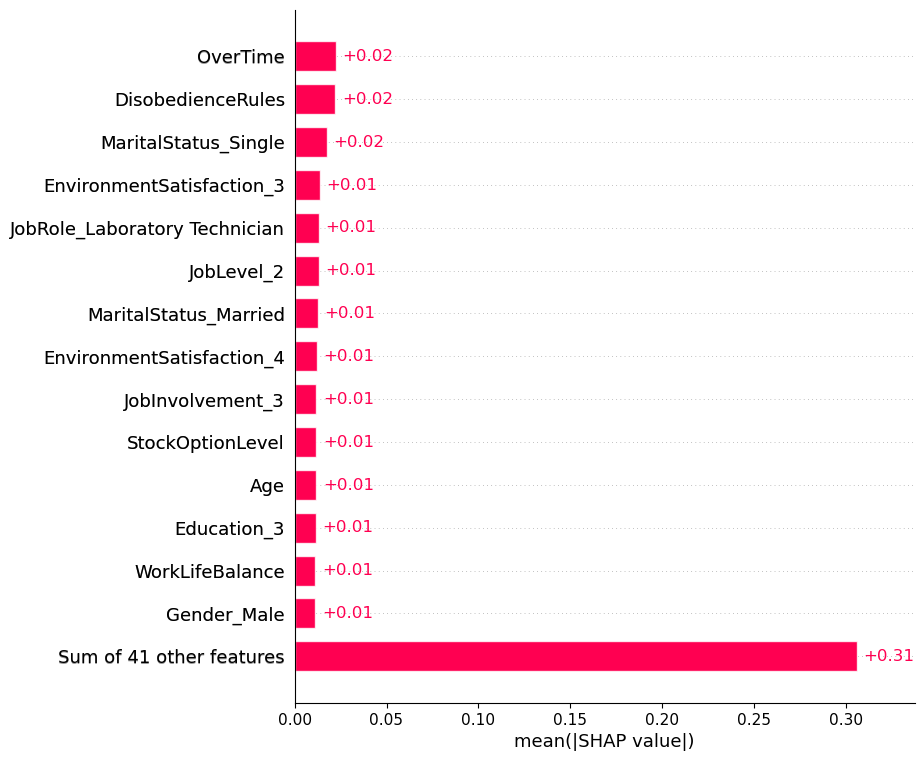

In [43]:
sh.plots.bar(shap_values, max_display=15)

**Observaciones:**
- El diagrama de barras anterior de SHAP muestra que **OverTime** es la característica más importante para el modelo K-NN ajustado para predecir el desgaste de los empleados porque podemos observar que las horas extra tenían el SHAP medio más alto de todas las características.
- Otras 13 funciones que se muestran en el diagrama de barras, como EnvironmentSatisfication_4, MartialStatus_Single, WorkLifeBalance, etc., tienen un valor SHAP medio de 0,01, lo que implica que estas funciones son igualmente importantes para las predicciones del modelo.
- La suma del valor SHAP medio para el resto de las características es 0,3. Implica que hay algunas características con un valor SHAP medio inferior a 0,01.

#### Trama de resumen

La gráfica de resumen SHAP muestra cómo las características de cada instancia (fila de datos) contribuyen a la predicción final.
- Aquí, el eje Y indica el nombre de la variable, en orden de importancia de arriba a abajo y el eje X es el valor SHAP, que indica el impacto en la salida del modelo.
- Cada punto representa una fila del conjunto de datos original.
- El color de los datos muestra los valores de las características. Esto nos permite ver cómo cambian los valores SHAP a medida que cambia el valor de la característica. El mapa de colores de la derecha ayuda a comprender qué valor es bajo y qué valor es alto. Si una característica tiene valores booleanos, tomará dos colores y para características continuas, puede contener todo el espectro.

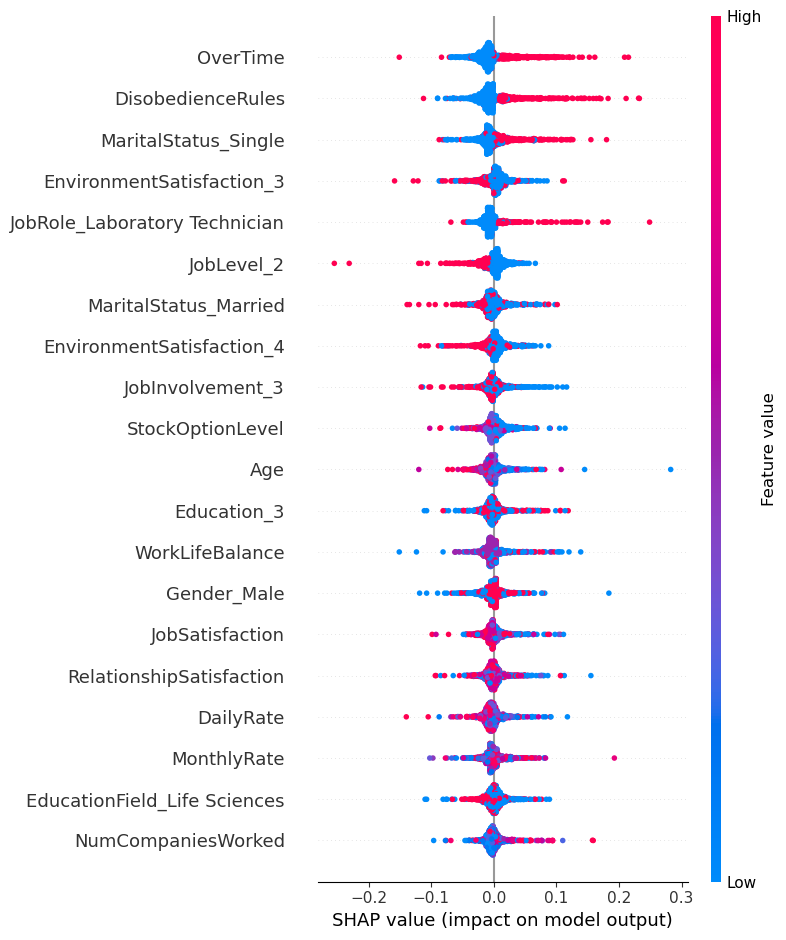

In [44]:
sh.summary_plot(shap_values)

**Observaciones:**

El diagrama de resumen muestra que OverTime, MartialStatus_Single y EnvironmentSatisfica-
tion_4 son las tres características más importantes para predecir si un empleado abandonaría o no.
Podemos observar que hay un impacto positivo en la salida del modelo, indicado por un valor SHAP
positivo, a medida que aumenta el valor de OverTime, indicado por puntos de color rojo. Esto im-
plica que los empleados que tienen valores más altos de tiempo extra tienen más probabilidades de
deserción (ya que la deserción = 1 es la clase positiva). También podemos observar que valores más
altos de EnvironmentSatisfication_4, indicados por puntos rojos, conducen a un impacto negativo
en la salida del modelo. Esto implica que los empleados que tienen una satisfacción ambiental muy
alta (es decir, Satisfacción ambiental_4 = 1) tienen menos probabilidades de deserción.

#### Gráfica de intensidad

El gráfico de intensidad SHAP le muestra exactamente qué característica tuvo la mayor influencia en la predicción del modelo para una observación única.

El siguiente gráfico explica una sola predicción del conjunto de prueba.

### Conclusiones

#### Conclusiones

- Probamos varios modelos y pudimos identificar los factores clave relacionados con la alta deserción en la organización.
- El modelo final, un clasificador K-NN sintonizado con hiperparámetros, se sobreajusta en el conjunto de datos de entrenamiento, pero ofrece la recuperación más alta en los conjuntos de datos de entrenamiento y prueba. Es posible que se pueda intentar y ajuste el modelo, y el departamento de recursos humanos puede usar este modelo para predecir si un empleado está en riesgo de desgaste o no.

#### Recomendaciones

- Vimos que trabajar horas extras es el factor más importante de deserción. La organización debe administrar su trabajo de manera más eficiente para que los empleados
no tengan que trabajar horas extras y puedan lograr un equilibrio entre el trabajo y la vida personal, o en su defecto. , la empresa podría proporcionar algunos incentivos adicionales a
los empleados que trabajan horas extras para retenerlos.
- Observamos que aproximadamente el 40 % de los empleados dieron una calificación baja a la satisfacción ambiental, lo que posiblemente contribuyó a una mayor tasa de
deserción. La organización debe centrarse en mejorar la cultura y el entorno de la organización aportando nuevas ideas para hacer que el entorno de la oficina sea más abierto y agradable.
- Como se observó, la organización tiene un mayor desgaste debido al equilibrio entre el trabajo y la vida personal. Es posible que la empresa deba centrarse en brindar
horarios flexibles a los empleados en lugar de hacerlos trabajar todo el día. Puede ayudar a los empleados a sentirse menos estresados y más productivos en su trabajo.
- La migración/los viajes frecuentes debido al trabajo también es un factor importante para la deserción. Los empleados que viajan con frecuencia una mayor distancia
debido al trabajo de oficina tienen más probabilidades de agotarse. Para dichos empleados, la compañía podría proporcionar instalaciones de transporte para que el viaje al trabajo de
dichos empleados sea más fácil.
- Los datos y el modelo sugieren que una menor participación laboral conduce a una mayor probabilidad de abandono. Esto puede deberse a la falta de oportunidades de
crecimiento o a un mal estilo de gestión. Es posible que se requiera un enfoque más proactivo y práctico por parte de los gerentes de la organización.
- Un ingreso mensual más alto podría reducir las probabilidades de que un empleado abandone. La empresa debe asegurarse de que todos sus empleados reciban una
compensación al menos según los estándares de la industria.
- Los empleados jóvenes y relativamente nuevos/sin experiencia tienden a mostrar una mayor tasa de deserción, especialmente los hombres. La organización podría
hacer un mejor seguimiento de los problemas que enfrentan los empleados con menos experiencia y proponer mejores ideas. sobre cómo la gerencia podría ayudarlos. Esto puede ayudar
a crear un entorno más saludable y acogedor para los empleados varones más jóvenes.
- La organización podría presentar un plan CTC revisado que incluya opciones sobre acciones para una mayor proporción de empleados para mantenerlos motivados.